In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [3]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Project/dataset/im_Parabasal/im_Parabasal/test/053_03_nuc.dat
/content/drive/MyDrive/Project/dataset/im_Parabasal/im_Parabasal/test/053_04_cyt.dat
/content/drive/MyDrive/Project/dataset/im_Parabasal/im_Parabasal/test/065_03.bmp
/content/drive/MyDrive/Project/dataset/im_Parabasal/im_Parabasal/test/066_06.bmp
/content/drive/MyDrive/Project/dataset/im_Parabasal/im_Parabasal/test/047_05_cyt.dat
/content/drive/MyDrive/Project/dataset/im_Parabasal/im_Parabasal/test/066_01.bmp
/content/drive/MyDrive/Project/dataset/im_Parabasal/im_Parabasal/test/062_05_nuc.dat
/content/drive/MyDrive/Project/dataset/im_Parabasal/im_Parabasal/test/055_02_cyt.dat
/content/drive/MyDrive/Project/dataset/im_Parabasal/im_Parabasal/test/052_05_cyt.dat
/content/drive/MyDrive/Project/dataset/im_Parabasal/im_Parabasal/test/049_01_cyt.dat
/content/drive/MyDrive/Project/dataset/im_Parabasal/im_Parabasal/test/052_01.bmp
/content/drive/MyDrive/Project

In [4]:
!pip install tensorflow
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [5]:
base_dir = "/content/drive/MyDrive/Project/dataset"
categories = ["im_Dyskeratotic", "im_Koilocytotic", "im_Metaplastic",
              "im_Parabasal", "im_Superficial-Intermediate"]

In [6]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set(style="whitegrid")

In [8]:
image_counts = {}

for category in categories:
    category_path = os.path.join(base_dir, category, category, "test")
    image_counts[category] = len([f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))])

print(image_counts)

{'im_Dyskeratotic': 813, 'im_Koilocytotic': 825, 'im_Metaplastic': 793, 'im_Parabasal': 787, 'im_Superficial-Intermediate': 831}


<ipython-input-9-48cc915aeff1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='viridis')


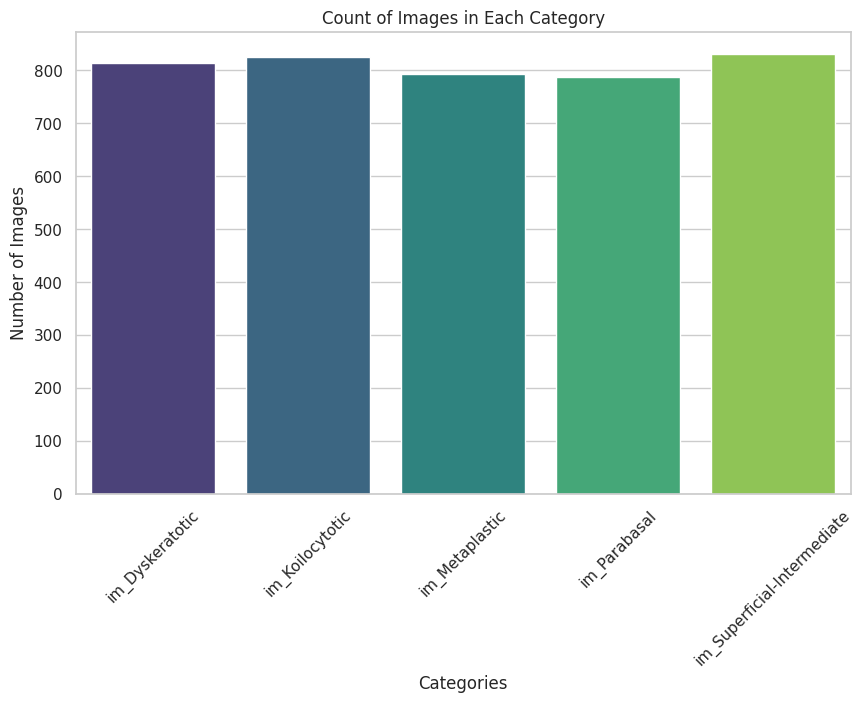

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='viridis')
plt.title('Count of Images in Each Category')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

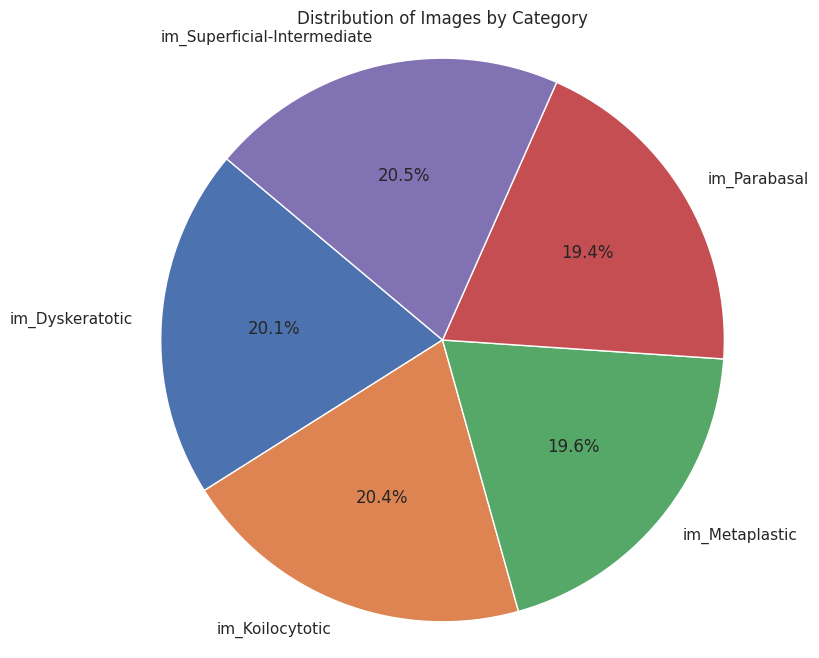

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(image_counts.values(), labels=image_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images by Category')
plt.axis('equal')
plt.show()

In [11]:
!pip install opencv-python
import cv2

In [12]:
def display_images_from_folders(base_dir, categories, num_images=5):
    plt.figure(figsize=(15, 10))

    for i, category in enumerate(categories):
        category_path = os.path.join(base_dir, category, category, "test")
        image_files = [f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))]

        for j, image_file in enumerate(image_files[:num_images]):

            img_path = os.path.join(category_path, image_file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

            plt.subplot(len(categories), num_images, i * num_images + j + 1)
            plt.imshow(image)
            plt.axis('off')
            plt.title(f"{category}")

    plt.tight_layout()
    plt.show()

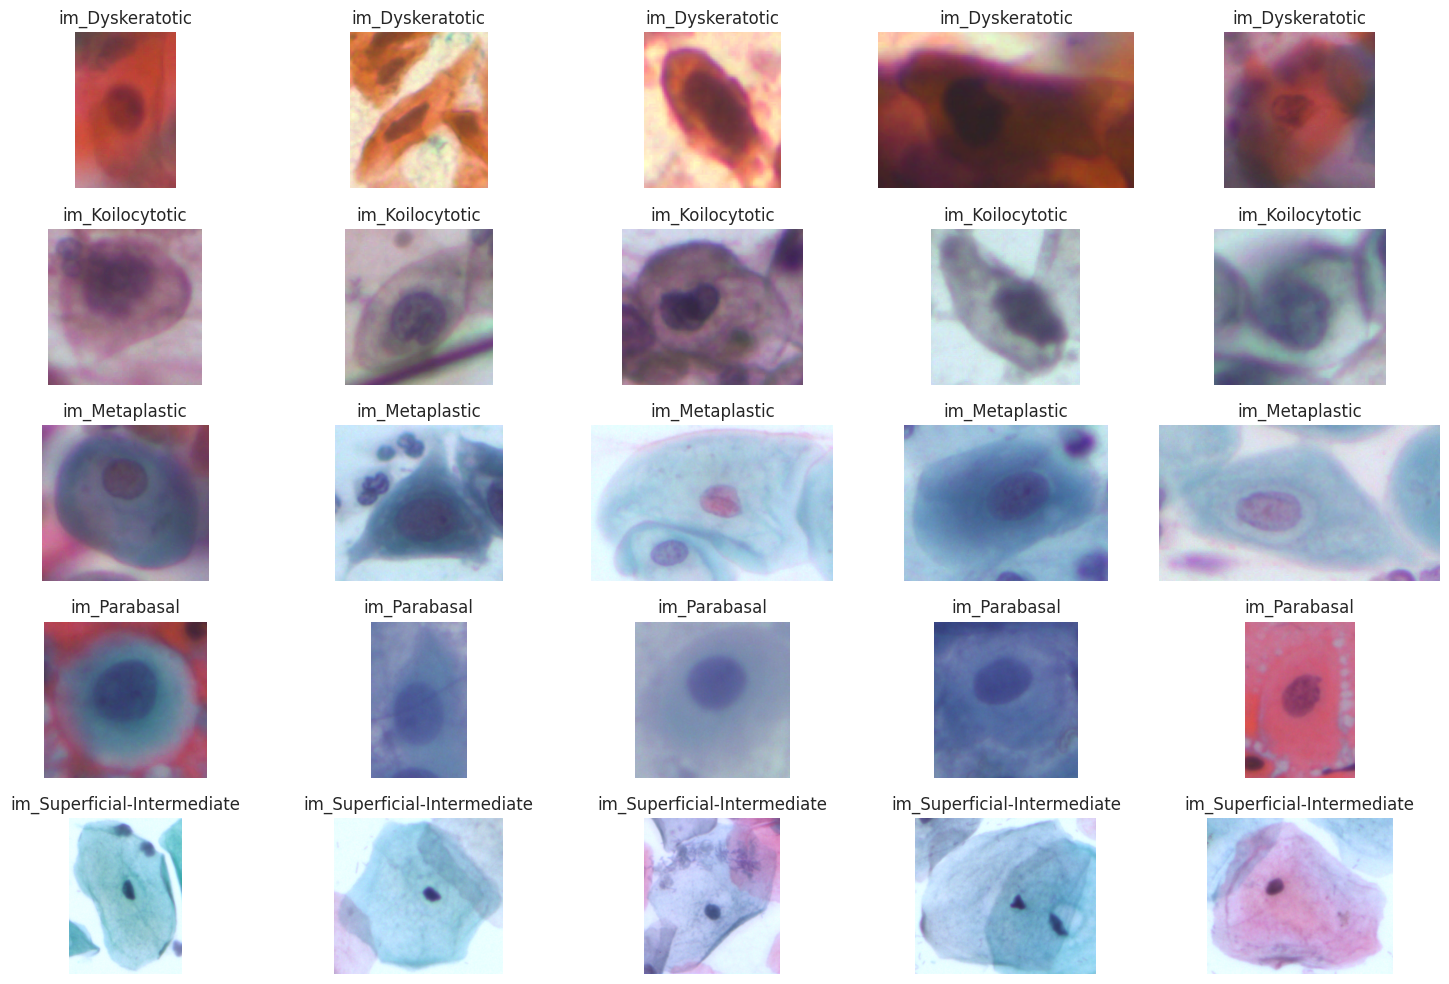

In [13]:
display_images_from_folders(base_dir, categories, num_images=5)

In [14]:
import pandas as pd

def create_image_paths_dataframe(base_dir, categories):
    data = []

    for category in categories:
        category_path = os.path.join(base_dir, category, category, "test")

        image_files = [f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))]

        for image_file in image_files:
            img_path = os.path.join(category_path, image_file)
            data.append({'image_path': img_path, 'label': category})

    df_image_paths = pd.DataFrame(data)

    return df_image_paths

In [15]:
df_image_paths = create_image_paths_dataframe(base_dir, categories)

In [16]:
df_image_paths.head()

,image_path,label
0,/content/drive/MyDrive/Project/dataset/im_Dysk...,im_Dyskeratotic
1,/content/drive/MyDrive/Project/dataset/im_Dysk...,im_Dyskeratotic
2,/content/drive/MyDrive/Project/dataset/im_Dysk...,im_Dyskeratotic
3,/content/drive/MyDrive/Project/dataset/im_Dysk...,im_Dyskeratotic
4,/content/drive/MyDrive/Project/dataset/im_Dysk...,im_Dyskeratotic


In [17]:
df_image_paths.tail()

,image_path,label
4044,/content/drive/MyDrive/Project/dataset/im_Supe...,im_Superficial-Intermediate
4045,/content/drive/MyDrive/Project/dataset/im_Supe...,im_Superficial-Intermediate
4046,/content/drive/MyDrive/Project/dataset/im_Supe...,im_Superficial-Intermediate
4047,/content/drive/MyDrive/Project/dataset/im_Supe...,im_Superficial-Intermediate
4048,/content/drive/MyDrive/Project/dataset/im_Supe...,im_Superficial-Intermediate


In [18]:
df_image_paths['label'].unique()

array(['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic',
       'im_Parabasal', 'im_Superficial-Intermediate'], dtype=object)

In [19]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

In [20]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df_image_paths[['image_path']], df_image_paths['label'])

In [21]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['label'] = y_resampled

In [22]:
print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())


Class distribution after oversampling:
label
im_Dyskeratotic                831
im_Koilocytotic                831
im_Metaplastic                 831
im_Parabasal                   831
im_Superficial-Intermediate    831
Name: count, dtype: int64


In [23]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [24]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  4155 non-null   object
 1   label       4155 non-null   object
dtypes: object(2)
memory usage: 65.1+ KB


In [25]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label']
)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 3324 validated image filenames belonging to 5 classes.
Found 415 validated image filenames belonging to 5 classes.
Found 416 validated image filenames belonging to 5 classes.


In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [29]:
print("Number of images in training data:", len(train_df_new))
print("Number of images in validation data:", len(valid_df_new))
print("Number of images in testing data:", len(test_df_new))

Number of images in training data: 3324
Number of images in validation data: 415
Number of images in testing data: 416


CNN Model

In [30]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

input_shape = (224, 224, 3)
num_classes = len(train_gen_new.class_indices)

cnn_model = create_cnn_model(input_shape, num_classes)

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [31]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [33]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 2702s 13s/step - accuracy: 0.4902 - loss: 1.2259 - val_accuracy: 0.6771 - val_loss: 0.7871
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.7483 - loss: 0.7129 - val_accuracy: 0.8145 - val_loss: 0.5584
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.7902 - loss: 0.5869 - val_accuracy: 0.8169 - val_loss: 0.5266
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.8057 - loss: 0.5222 - val_accuracy: 0.8482 - val_loss: 0.4198
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.8406 - loss: 0.4415 - val_accuracy: 0.8651 - val_loss: 0.4018
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.8641 - loss: 0.4008 - val_accuracy: 0.8892 - val_loss: 0.3273
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.8936 - loss: 0.3140 - val_accuracy: 0.8627 - val_loss: 0.4117
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.8999 - loss: 0.2866 -

In [36]:
import pickle

# Specify the path to save the history
history_path = '/content/drive/MyDrive/Project/Model/model_historycnn.pkl'

# Save the history object using pickle
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f)

print(f"Training history saved to: {history_path}")

Training history saved to: /content/drive/MyDrive/Project/Model/model_historycnn.pkl


In [37]:
model_path = '/content/drive/MyDrive/Project/Model/cnn.h5'  # Choose a path and filename
cnn_model.save(model_path)

print(f"Model saved to: {model_path}")

Model saved to: /content/drive/MyDrive/Project/Model/cnn.h5


26/26 - 264s - 10s/step - accuracy: 0.8798 - loss: 0.3917

Test accuracy: 0.879807710647583

Test loss: 0.3916867971420288


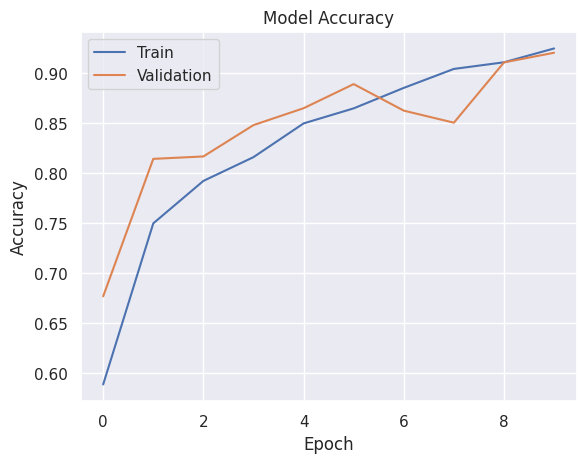

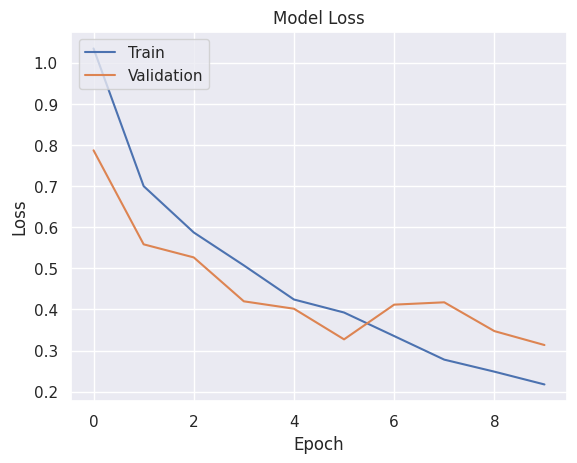

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

# Load the saved model
model_path = '/content/drive/MyDrive/Project/Model/cnn.h5'
loaded_model = tf.keras.models.load_model(model_path)

# Evaluate the model on the test data (assuming you have test_gen_new defined)
test_loss, test_acc = loaded_model.evaluate(test_gen_new, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# Load the saved training history from the pickle file
history_path = '/content/drive/MyDrive/Project/Model/model_historycnn.pkl'
with open(history_path, 'rb') as f:
    loaded_history = pickle.load(f)

# Plot the training and validation accuracy
if 'accuracy' in loaded_history and 'val_accuracy' in loaded_history:
    plt.plot(loaded_history['accuracy'])
    plt.plot(loaded_history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Accuracy information not found in the loaded history.")

# Plot the training and validation loss
if 'loss' in loaded_history and 'val_loss' in loaded_history:
    plt.plot(loaded_history['loss'])
    plt.plot(loaded_history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Loss information not found in the loaded history.")

In [39]:
test_labels = test_gen_new.classes
predictions = loaded_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


In [40]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

                             precision    recall  f1-score   support

            im_Dyskeratotic       0.90      0.86      0.88        83
            im_Koilocytotic       0.73      0.83      0.78        83
             im_Metaplastic       0.93      0.81      0.86        83
               im_Parabasal       0.98      0.96      0.97        84
im_Superficial-Intermediate       0.90      0.94      0.92        83

                   accuracy                           0.88       416
                  macro avg       0.89      0.88      0.88       416
               weighted avg       0.89      0.88      0.88       416



In [41]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

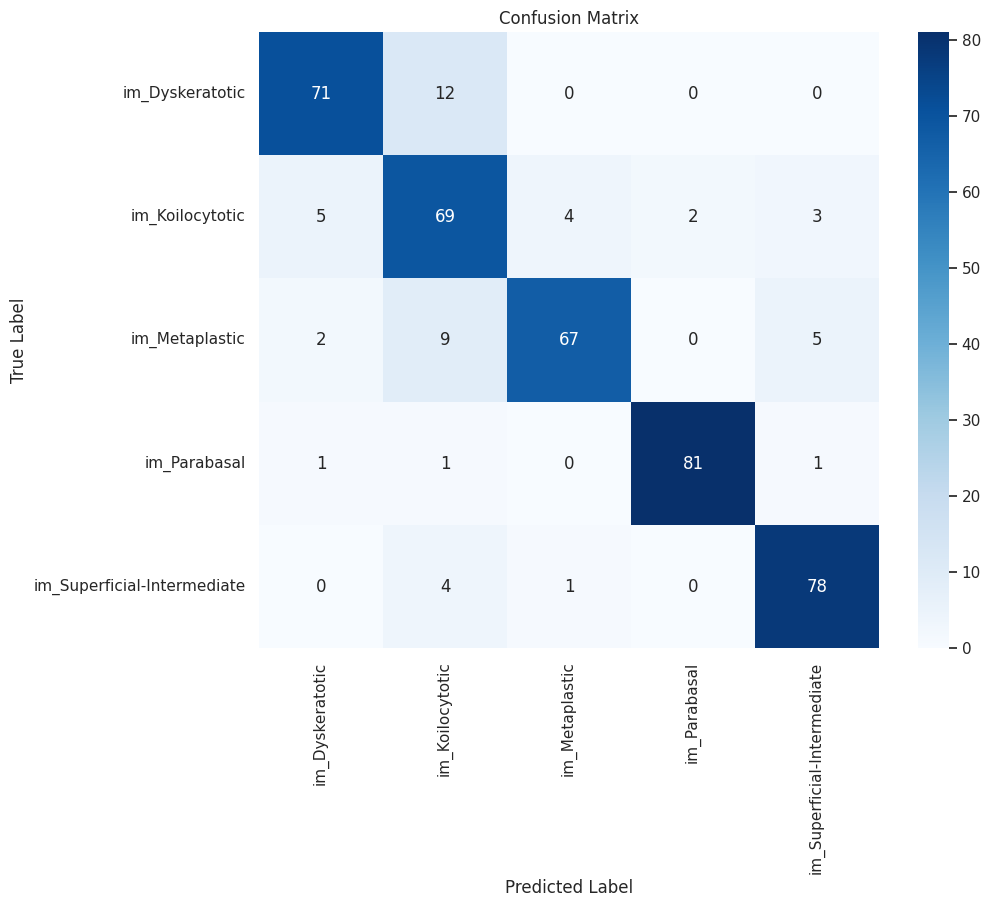

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#############################################

InceptionV3

In [30]:
from tensorflow.keras.applications import InceptionV3

def create_inception_model(input_shape):

    base_model = InceptionV3(weights='imagenet', input_shape=input_shape, include_top=False)


    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)

    model.add(GaussianNoise(0.25))

    model.add(GlobalAveragePooling2D())

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(GaussianNoise(0.25))
    model.add(Dropout(0.25))

    model.add(Dense(5, activation='softmax'))

    return model

In [31]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise

In [32]:
input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise (GaussianNoise)  │ (None, 5, 5, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_1                │ (None, 512)            │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,856,485 (87.19 MB)

 Trainable params: 1,052,677 (4.02 MB)

 Non-trainable params: 21,803,808 (83.17 MB)

In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [35]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1364s 6s/step - accuracy: 0.5878 - loss: 1.1658 - val_accuracy: 0.8434 - val_loss: 0.4440
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.8289 - loss: 0.4722 - val_accuracy: 0.8843 - val_loss: 0.3537
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.8755 - loss: 0.3450 - val_accuracy: 0.8554 - val_loss: 0.3909
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.9079 - loss: 0.2746 - val_accuracy: 0.8795 - val_loss: 0.3347
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.9246 - loss: 0.2375 - val_accuracy: 0.8988 - val_loss: 0.3107
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.9405 - loss: 0.2025 - val_accuracy: 0.8940 - val_loss: 0.3144
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.9448 - loss: 0.1718 - val_accuracy: 0.8867 - val_loss: 0.3063
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - accuracy: 0.9597 - loss: 0.1291 - 

In [36]:
import pickle

# Specify the path to save the history
history_path = '/content/drive/MyDrive/Project/Model/model_historyIN3.pkl'

# Save the history object using pickle
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f)

print(f"Training history saved to: {history_path}")

Training history saved to: /content/drive/MyDrive/Project/Model/model_historyIN3.pkl


In [37]:
model_path = '/content/drive/MyDrive/Project/Model/IN3.h5'  # Choose a path and filename
cnn_model.save(model_path)

print(f"Model saved to: {model_path}")

Model saved to: /content/drive/MyDrive/Project/Model/IN3.h5


26/26 - 138s - 5s/step - accuracy: 0.8558 - loss: 0.3893

Test accuracy: 0.8557692170143127

Test loss: 0.3893085718154907


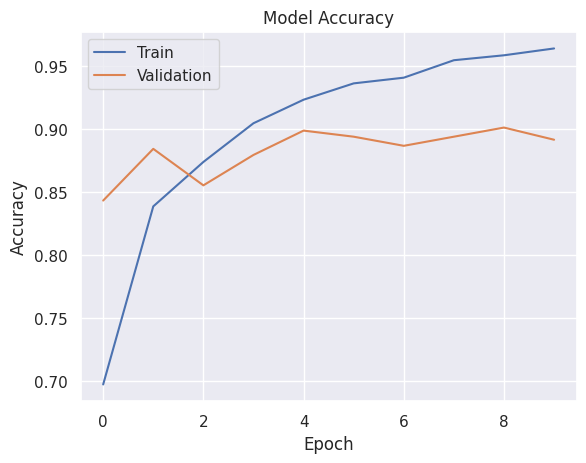

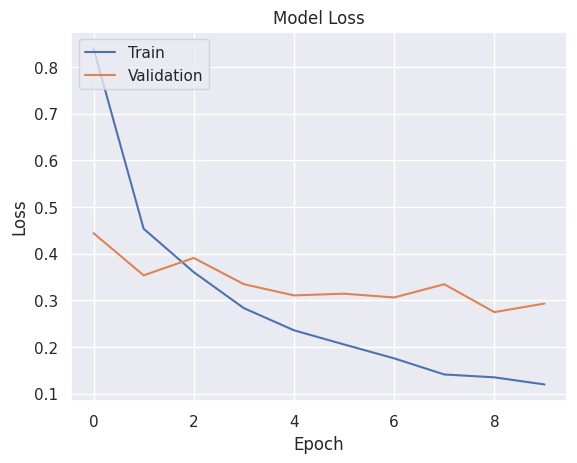

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

# Load the saved model
model_path = '/content/drive/MyDrive/Project/Model/IN3.h5'
loaded_model = tf.keras.models.load_model(model_path)

# Evaluate the model on the test data (assuming you have test_gen_new defined)
test_loss, test_acc = loaded_model.evaluate(test_gen_new, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# Load the saved training history from the pickle file
history_path = '/content/drive/MyDrive/Project/Model/model_historyIN3.pkl'
with open(history_path, 'rb') as f:
    loaded_history = pickle.load(f)

# Plot the training and validation accuracy
if 'accuracy' in loaded_history and 'val_accuracy' in loaded_history:
    plt.plot(loaded_history['accuracy'])
    plt.plot(loaded_history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Accuracy information not found in the loaded history.")

# Plot the training and validation loss
if 'loss' in loaded_history and 'val_loss' in loaded_history:
    plt.plot(loaded_history['loss'])
    plt.plot(loaded_history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Loss information not found in the loaded history.")

In [39]:
test_labels = test_gen_new.classes
predictions = loaded_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step


In [40]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

                             precision    recall  f1-score   support

            im_Dyskeratotic       0.83      0.77      0.80        83
            im_Koilocytotic       0.70      0.83      0.76        83
             im_Metaplastic       0.91      0.76      0.83        83
               im_Parabasal       0.97      0.93      0.95        84
im_Superficial-Intermediate       0.90      0.99      0.94        83

                   accuracy                           0.86       416
                  macro avg       0.86      0.86      0.86       416
               weighted avg       0.86      0.86      0.86       416



In [41]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

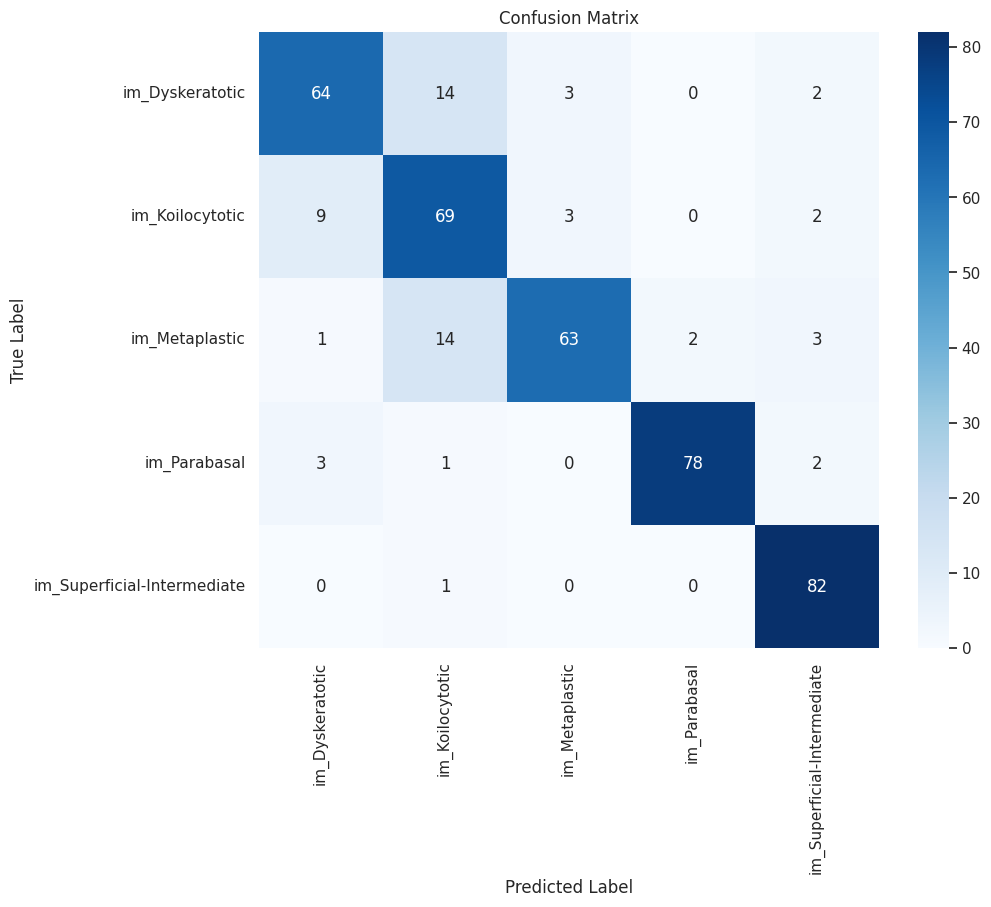

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
######################################

Xception

In [30]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):

    base_model = Xception(weights='imagenet', input_shape=input_shape, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GaussianNoise(0.25))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(GaussianNoise(0.25))
    model.add(Dropout(0.25))
    model.add(Dense(5, activation='softmax'))

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:


cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise (GaussianNoise)  │ (None, 7, 7, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_1                │ (None, 512)            │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,915,181 (83.60 MB)

 Trainable params: 1,052,677 (4.02 MB)

 Non-trainable params: 20,862,504 (79.58 MB)

In [32]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [33]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1000s 5s/step - accuracy: 0.5929 - loss: 1.1266 - val_accuracy: 0.8434 - val_loss: 0.5689
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.8402 - loss: 0.4465 - val_accuracy: 0.8916 - val_loss: 0.3305
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8874 - loss: 0.3214 - val_accuracy: 0.9036 - val_loss: 0.2798
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9113 - loss: 0.2431 - val_accuracy: 0.9060 - val_loss: 0.2714
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9312 - loss: 0.2013 - val_accuracy: 0.9036 - val_loss: 0.2404
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - accuracy: 0.9314 - loss: 0.1861 - val_accuracy: 0.9036 - val_loss: 0.2693
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9475 - loss: 0.1516 - val_accuracy: 0.8940 - val_loss: 0.2834
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - accuracy: 0.9520 - loss: 0.1393 - 

In [34]:
import pickle

# Specify the path to save the history
history_path = '/content/drive/MyDrive/Project/Model/model_historyXCP.pkl'

# Save the history object using pickle
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f)

print(f"Training history saved to: {history_path}")

Training history saved to: /content/drive/MyDrive/Project/Model/model_historyXCP.pkl


In [38]:
model_path = '/content/drive/MyDrive/Project/Model/XCP.h5'  # Choose a path and filename
cnn_model.save(model_path)

print(f"Model saved to: {model_path}")

Model saved to: /content/drive/MyDrive/Project/Model/XCP.h5


26/26 - 106s - 4s/step - accuracy: 0.8774 - loss: 0.3753

Test accuracy: 0.8774038553237915

Test loss: 0.3753416836261749


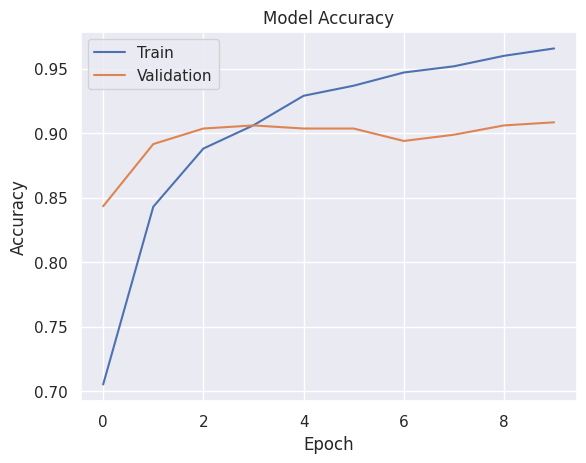

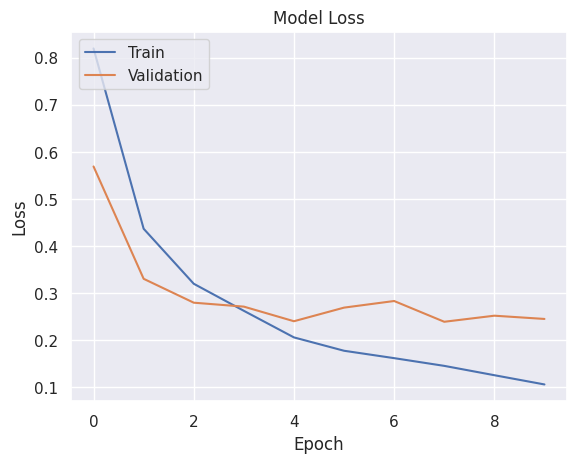

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

# Load the saved model
model_path = '/content/drive/MyDrive/Project/Model/XCP.h5'
loaded_model = tf.keras.models.load_model(model_path)

# Evaluate the model on the test data (assuming you have test_gen_new defined)
test_loss, test_acc = loaded_model.evaluate(test_gen_new, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# Load the saved training history from the pickle file
history_path = '/content/drive/MyDrive/Project/Model/model_historyXCP.pkl'
with open(history_path, 'rb') as f:
    loaded_history = pickle.load(f)

# Plot the training and validation accuracy
if 'accuracy' in loaded_history and 'val_accuracy' in loaded_history:
    plt.plot(loaded_history['accuracy'])
    plt.plot(loaded_history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Accuracy information not found in the loaded history.")

# Plot the training and validation loss
if 'loss' in loaded_history and 'val_loss' in loaded_history:
    plt.plot(loaded_history['loss'])
    plt.plot(loaded_history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Loss information not found in the loaded history.")

In [40]:
test_labels = test_gen_new.classes
predictions = loaded_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step


In [41]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

                             precision    recall  f1-score   support

            im_Dyskeratotic       0.89      0.92      0.90        83
            im_Koilocytotic       0.74      0.84      0.79        83
             im_Metaplastic       0.91      0.77      0.84        83
               im_Parabasal       0.93      0.90      0.92        84
im_Superficial-Intermediate       0.93      0.95      0.94        83

                   accuracy                           0.88       416
                  macro avg       0.88      0.88      0.88       416
               weighted avg       0.88      0.88      0.88       416



In [42]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

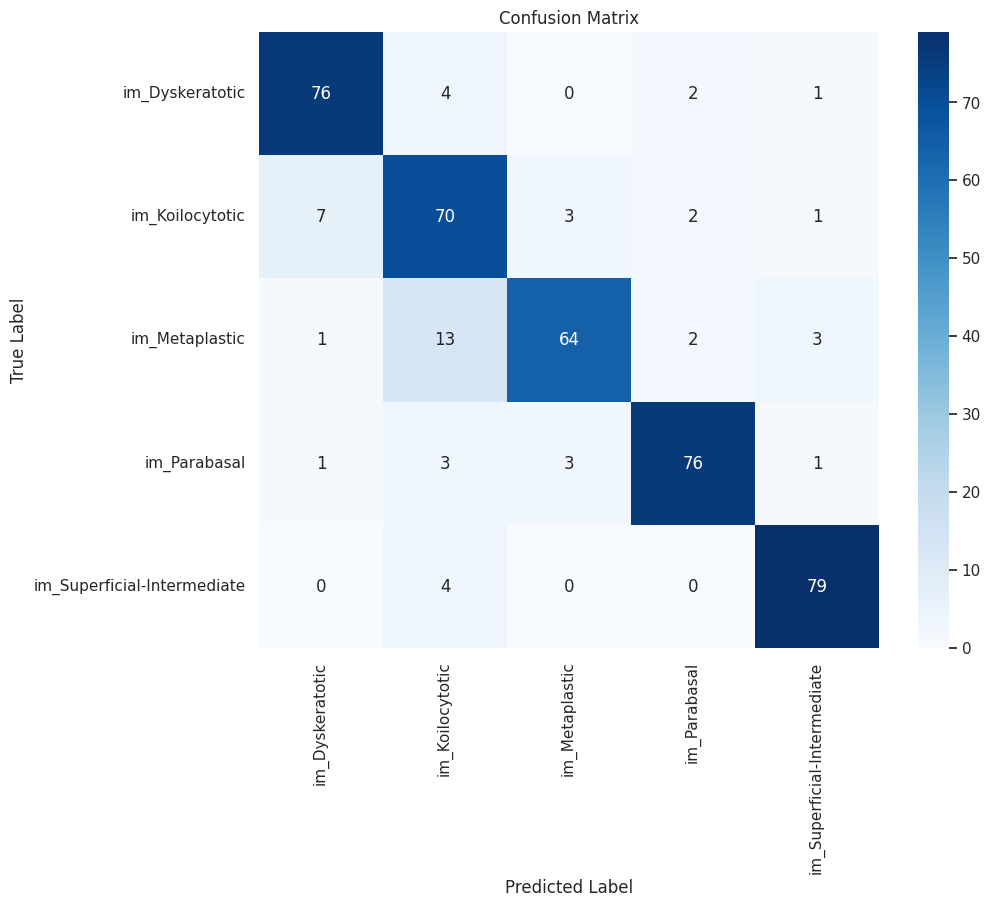

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

VGG19

In [ ]:
#using VGG19 pre-trained model
vgg19Net = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet',
input_shape=(224, 224, 3))  # Assuming input_shape is (224, 224, 3)
vgg19Net.trainable = False
# Freeze the layers
for layer in vgg19Net.layers:
    layer.trainable = False

base_vgg19 = vgg19Net
base_out_vgg19= base_vgg19.output
pool_out_vgg19 = tf.keras.layers.Flatten()(base_out_vgg19)
hidden1_vgg19 = tf.keras.layers.Dense(512, activation='relu')(pool_out_vgg19)
drop1_vgg19 = tf.keras.layers.Dropout(rate=0.3)(hidden1_vgg19)
hidden2_vgg19 = tf.keras.layers.Dense(512, activation='relu')(drop1_vgg19)
drop2_vgg19 = tf.keras.layers.Dropout(rate=0.3)(hidden2_vgg19)
out_vgg19 = tf.keras.layers.Dense(5, activation='softmax')(drop2_vgg19)  # Changed to 5 output classes

vgg19_model = tf.keras.Model(inputs=base_vgg19.input, outputs=out_vgg19)
vgg19_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                loss='sparse_categorical_crossentropy',  # Changed to sparse_categorical_crossentropy
                metrics=['accuracy'])
vgg19_model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             

 Total params: 33,135,173 (126.40 MB)

 Trainable params: 13,110,789 (50.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = vgg19_model.fit( # Changed cnn_model to vgg19_model
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 888s 4s/step - accuracy: 0.3942 - loss: 1.4639 - val_accuracy: 0.7446 - val_loss: 0.7758
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.6823 - loss: 0.8383 - val_accuracy: 0.7880 - val_loss: 0.5946
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 28s 136ms/step - accuracy: 0.7633 - loss: 0.6574 - val_accuracy: 0.8530 - val_loss: 0.4434
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 29s 137ms/step - accuracy: 0.7848 - loss: 0.6019 - val_accuracy: 0.8482 - val_loss: 0.4272
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 29s 138ms/step - accuracy: 0.8183 - loss: 0.4973 - val_accuracy: 0.8096 - val_loss: 0.4615
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 29s 140ms/step - accuracy: 0.8148 - loss: 0.5025 - val_accuracy: 0.8602 - val_loss: 0.3602
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 29s 141ms/step - accuracy: 0.8464 - loss: 0.4358 - val_accuracy: 0.8675 - val_loss: 0.3823
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 30s 143ms/step - accuracy: 0.8429 - loss: 0.4

In [ ]:
import pickle

# Specify the path to save the history
history_path = '/content/drive/MyDrive/Project/Model/model_historyVGG19.pkl'

# Save the history object using pickle
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f)

print(f"Training history saved to: {history_path}")

Training history saved to: /content/drive/MyDrive/model/model_historyVGG19.pkl


In [ ]:
model_path = '/content/drive/MyDrive/Project/Model/VGG19.h5'  # Choose a path and filename
vgg19_model.save(model_path) # Changed cnn_model to vgg19_model

print(f"Model saved to: {model_path}")

Model saved to: /content/drive/MyDrive/model/VGG19.h5


26/26 - 89s - 3s/step - accuracy: 0.8966 - loss: 0.2899

Test accuracy: 0.8966346383094788

Test loss: 0.28991392254829407


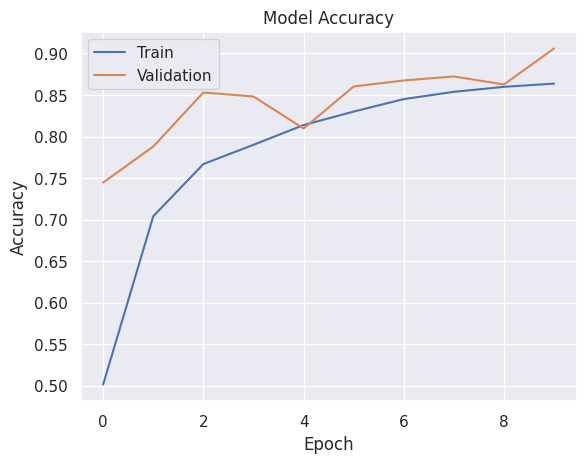

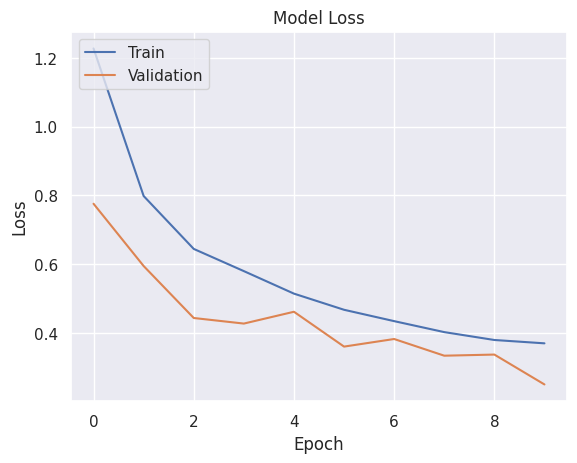

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

# Load the saved model
model_path = '/content/drive/MyDrive/Project/Model/VGG19.h5'
loaded_model = tf.keras.models.load_model(model_path)

# Evaluate the model on the test data (assuming you have test_gen_new defined)
test_loss, test_acc = loaded_model.evaluate(test_gen_new, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# Load the saved training history from the pickle file
history_path = '/content/drive/MyDrive/Project/Model/model_historyVGG19.pkl'
with open(history_path, 'rb') as f:
    loaded_history = pickle.load(f)

# Plot the training and validation accuracy
if 'accuracy' in loaded_history and 'val_accuracy' in loaded_history:
    plt.plot(loaded_history['accuracy'])
    plt.plot(loaded_history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Accuracy information not found in the loaded history.")

# Plot the training and validation loss
if 'loss' in loaded_history and 'val_loss' in loaded_history:
    plt.plot(loaded_history['loss'])
    plt.plot(loaded_history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
else:
    print("Loss information not found in the loaded history.")

In [ ]:
test_labels = test_gen_new.classes
predictions = loaded_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

                             precision    recall  f1-score   support

            im_Dyskeratotic       0.88      0.88      0.88        83
            im_Koilocytotic       0.80      0.84      0.82        83
             im_Metaplastic       0.95      0.86      0.90        83
               im_Parabasal       0.94      0.95      0.95        84
im_Superficial-Intermediate       0.92      0.95      0.93        83

                   accuracy                           0.90       416
                  macro avg       0.90      0.90      0.90       416
               weighted avg       0.90      0.90      0.90       416



In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

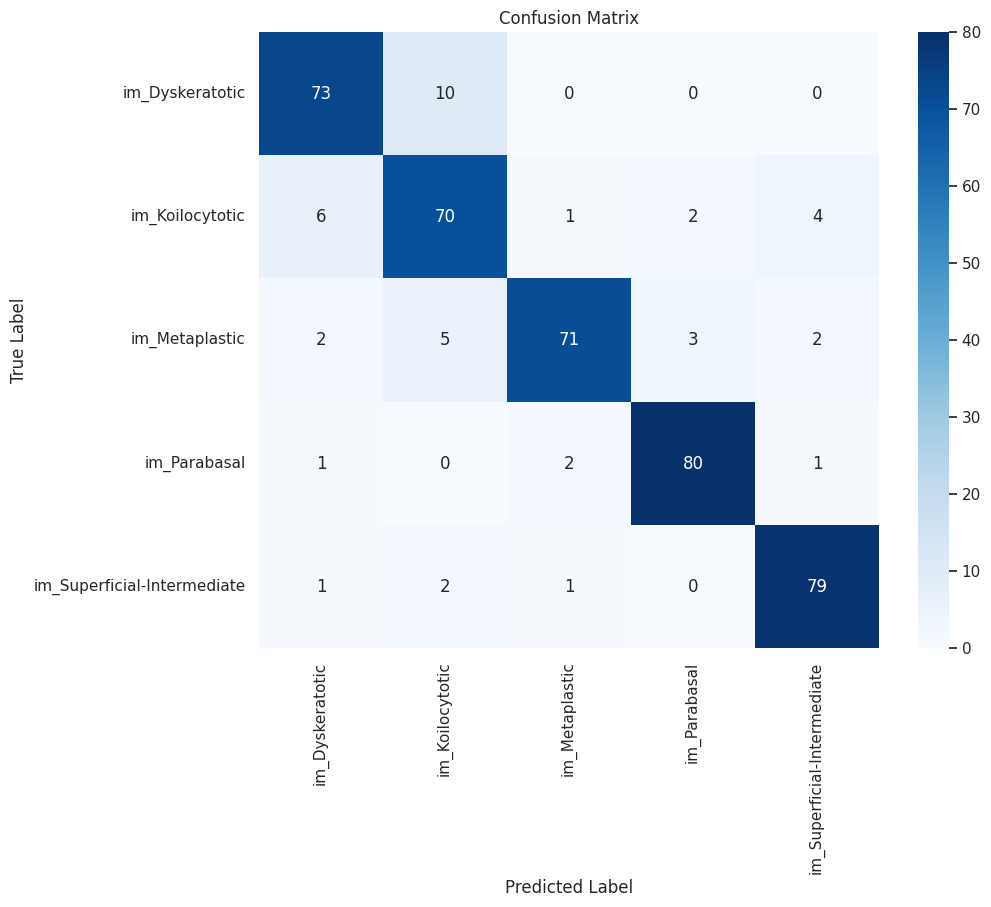

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()